In [1]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering # liberary(sklearn)-> module(cluster)->(AgglomerativeClustering CALLED)
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import numpy as np
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("crime_data.csv")

In [4]:
df.rename(columns = {"Unnamed: 0" : "States"}, inplace = True)
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.shape

(50, 5)

In [6]:
pd.DataFrame(df["States"]).shape # 50 states

(50, 1)

In [7]:
df1=pd.get_dummies(df)
df1.shape

(50, 54)

In [8]:
df.duplicated().sum() # NO DUPLICATES.

0

In [9]:
df.info() # No Null Values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
from sklearn.preprocessing import StandardScaler

# Making Object:-
sc = StandardScaler()

df1_scaled = sc.fit_transform(df1)

df1_scaled.shape

(50, 54)

# Hierarichal Clustering:- 

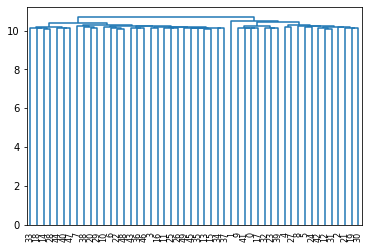

In [11]:
dendrogram = sch.dendrogram(sch.linkage(df1_scaled, method='average'))

In [12]:
hc = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage ="average")

# save clusters for chart
y_hc = hc.fit_predict(df1_scaled)
Clusters  = pd.DataFrame(y_hc, columns= ["Clusters"])
Clusters

,Clusters
0,3
1,2
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [13]:
Clusters.value_counts()

Clusters
0           30
1           12
3            7
2            1
dtype: int64

In [14]:
merge = [df, Clusters]

df_hierarchy = pd.concat(merge,axis=1)
# 
df_hierarchy.sort_values("Clusters")

,States,Murder,Assault,UrbanPop,Rape,Clusters
49,Wyoming,6.8,161,60,15.6,0
28,New Hampshire,2.1,57,56,9.5,0
34,Ohio,7.3,120,75,21.4,0
26,Nebraska,4.3,102,62,16.5,0
25,Montana,6.0,109,53,16.4,0
48,Wisconsin,2.6,53,66,10.8,0
35,Oklahoma,6.6,151,68,20.0,0
22,Minnesota,2.7,72,66,14.9,0
36,Oregon,4.9,159,67,29.3,0
20,Massachusetts,4.4,149,85,16.3,0


# K-Means Clustering:-

In [15]:
from sklearn.cluster import KMeans

C:\Users\rhtmi\anaconda last\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


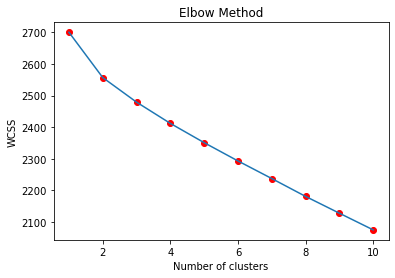

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df1_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.scatter(range(1,11), wcss, color = "red")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
wcss # Conclusion:- wcss drop rapidlly wehen number of cluster changes from 2->4.

[2750.000000000002,
 2598.610071201664,
 2481.6978993732464,
 2406.4092613034986,
 2351.23247012617,
 2292.7683672915514,
 2239.9402982156807,
 2181.9084700888843,
 2129.7377447456124,
 2074.7548046742613]

In [76]:
from sklearn.metrics import silhouette_score
silhouette_score(df1_scaled, clusters.labels_)

0.03045322351301802

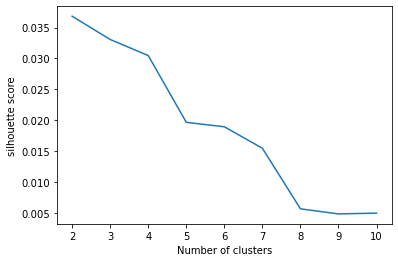

In [78]:
silhouettescore=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(df1_scaled)
    silhouettescore.append(silhouette_score(df1_scaled,kmeans.labels_))
    
plt.plot(range(2,11),silhouettescore)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

In [17]:
# Building Cluster algorithm
from sklearn.cluster import KMeans
clusters = KMeans(2, random_state= 42)
clusters.fit(df1_scaled)

KMeans(n_clusters=2, random_state=42)

In [18]:
clusters.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [19]:
#Assigning cluster to dataset.
df["clusters"] = clusters.labels_
df.head()

,States,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [20]:
clusters.cluster_centers_

array([[-0.67675778, -0.68274685, -0.13306084, -0.57037591, -0.14285714,
        -0.14285714, -0.14285714,  0.0952381 , -0.14285714, -0.14285714,
         0.0952381 ,  0.0952381 , -0.14285714, -0.14285714,  0.0952381 ,
         0.0952381 , -0.14285714,  0.0952381 ,  0.0952381 ,  0.0952381 ,
         0.0952381 , -0.14285714,  0.0952381 , -0.14285714,  0.0952381 ,
        -0.14285714,  0.0952381 , -0.14285714, -0.14285714,  0.0952381 ,
         0.0952381 , -0.14285714,  0.0952381 ,  0.0952381 , -0.14285714,
        -0.14285714, -0.14285714,  0.0952381 ,  0.0952381 ,  0.0952381 ,
         0.0952381 ,  0.0952381 ,  0.0952381 , -0.14285714,  0.0952381 ,
        -0.14285714, -0.14285714,  0.0952381 ,  0.0952381 ,  0.0952381 ,
         0.0952381 ,  0.0952381 ,  0.0952381 ,  0.0952381 ],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386,  0.21428571,
         0.21428571,  0.21428571, -0.14285714,  0.21428571,  0.21428571,
        -0.14285714, -0.14285714,  0.21428571,  0.21428571, -0.

<AxesSubplot:>

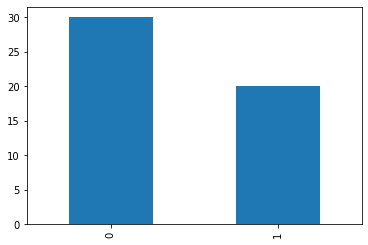

In [21]:
df["clusters"].value_counts().plot.bar()

In [22]:
df.sort_values("clusters")

,States,Murder,Assault,UrbanPop,Rape,clusters
49,Wyoming,6.8,161,60,15.6,0
35,Oklahoma,6.6,151,68,20.0,0
29,New Jersey,7.4,159,89,18.8,0
28,New Hampshire,2.1,57,56,9.5,0
36,Oregon,4.9,159,67,29.3,0
26,Nebraska,4.3,102,62,16.5,0
25,Montana,6.0,109,53,16.4,0
48,Wisconsin,2.6,53,66,10.8,0
37,Pennsylvania,6.3,106,72,14.9,0
22,Minnesota,2.7,72,66,14.9,0


# DBSCAN Clustering:-
# (density-based spatial clustering of applications with noise)

In [23]:
from sklearn.cluster import DBSCAN

In [28]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(df1)
df_scaled = stscaler.transform(df1)


In [30]:
dbscan = DBSCAN(eps = 0.8, min_samples = 8)
dbscan.fit(df_scaled)

DBSCAN(eps=0.8, min_samples=8)

In [31]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)